<a href="https://colab.research.google.com/github/kafikewu/Pattern-Mining/blob/master/Pattern_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
dataset = []
with open("/content/drive/MyDrive/CSE477 Project/kosarak.dat") as f:
  for line in f:
    dataline = [int(i) for i in line.split(' ')] ## Due to the last position having \n
    dataset.append(dataline)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
transactionencoder = TransactionEncoder()
arr = transactionencoder.fit_transform(dataset, sparse = True)
df = pd.DataFrame.sparse.from_spmatrix(data=arr, columns=[str(i) for i in transactionencoder.columns_]) ## After fit_transform, the transactionencoder automatically generates the columns
# df = pd.DataFrame(data=arr, columns=[str(i) for i in transactionencoder.columns_])
# df.memory_usage(index=True).sum()

In [ ]:
## Used for pruned datasets.
# df = pd.read_csv('/content/drive/MyDrive/CSE477 Project/chessCleaned(0.5).csv')
# df.pop('Unnamed: 0')
# print(df.describe())
# df.memory_usage(index=True).sum()


           1      2     3      4     5  ...     71    72     73    74     75
count   3196   3196  3196   3196  3196  ...   3196  3196   3196  3196   3196
unique     2      2     2      2     2  ...      2     2      2     2      2
top     True  False  True  False  True  ...  False  True  False  True  False
freq    1669   1669  2839   2839  2971  ...   2007  2345   2345  2407   2407

[4 rows x 66 columns]


211064

In [ ]:
import seaborn as sns

In [ ]:
from mlxtend.frequent_patterns import apriori
import time 
apriori_time = []
for i in range(50, 100, 5):
    print(i)
    for j in range(0, 10):
      start = time.time()
      value = apriori(df, min_support=(i/100), use_colnames=True)
      print(len(value))
      end = time.time()
      exc_time = end - start
      print(len(value))
      apriori_time.append([str(i), exc_time, len(value), 'Apriori'])
Apriori_dataframe = pd.DataFrame(data=apriori_time, columns=['Threshold', 'Time', 'Number_of_patterns', 'Algorithm'])
Apriori_dataframe.to_csv("/content/drive/MyDrive/CSE477 Project/Chess(0.5)_Apriori.csv")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Threshold", y="Time", data=Apriori_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess(0.5)_Apriori.png")

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
import time 
fp_time = []
for i in range(50, 100, 5):
    print(i)
    for j in range(0, 10):
      start = time.time()
      value = fpgrowth(df, min_support=(i/100), use_colnames=True)
      print(len(value))
      end = time.time()
      exc_time = end-start
      fp_time.append([str(i), exc_time, len(value), 'Fp-Growth'])
Fp_dataframe = pd.DataFrame(data=fp_time, columns=['Threshold', 'Time', 'Number_of_patterns', 'Algorithm'])
Fp_dataframe.to_csv("/content/drive/MyDrive/CSE477 Project/Chess(0.5)_Fp.csv")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Threshold", y="Time", data=Fp_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess(0.5)_Fp.png")
print(Fp_dataframe)

# This is used just for analysis purposes
counter = Counter([j for i in range(len(dataset)) for j in dataset[i]]) <br/>
counter.most_common()

# It is used to upgrade mlxtend
%pip install mlxtend --upgrade

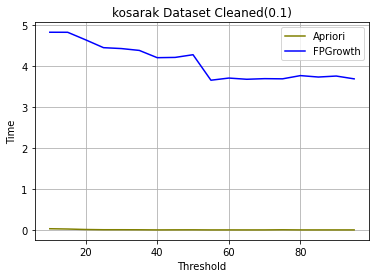

In [ ]:
import matplotlib.pyplot as plt
x, y1, y2 = [i for i in apriori_time.keys()], [i for i in apriori_time.values()], [i for i in fpgrowth_time.values()]
plt.plot(x, y1, label='Apriori', color = 'olive')
plt.plot(x, y2, label = 'FPGrowth', color= 'blue')
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Time")
plt.title("kosarak Dataset Cleaned(0.1)")
plt.legend()
plt.savefig('/content/drive/MyDrive/CSE477 Project/kosarakCleaned(0.1).png', dpi = 300)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 5.1MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


   Threshold      Time  Number_of_patterns  Algorithm
0         50  6.040963                   1  Fp-Growth
1         50  5.826162                   1  Fp-Growth
2         50  5.924795                   1  Fp-Growth
3         50  6.051424                   1  Fp-Growth
4         50  5.941048                   1  Fp-Growth
..       ...       ...                 ...        ...
95        95  4.864044                   0  Fp-Growth
96        95  4.946241                   0  Fp-Growth
97        95  4.982345                   0  Fp-Growth
98        95  4.942907                   0  Fp-Growth
99        95  4.880034                   0  Fp-Growth

[100 rows x 4 columns]


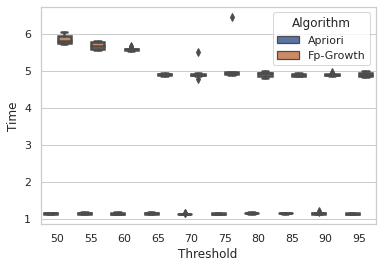

In [ ]:
Apriori_dataframe = Apriori_dataframe.append(Fp_dataframe)
# Apriori_dataframe.rename(columns=)
ax = sns.boxplot(x="Threshold", y="Time", hue="Algorithm",
                 data=Apriori_dataframe, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Chess(0.5)_Comparison.png")
print(Fp_dataframe)

No handles with labels found to put in legend.


[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


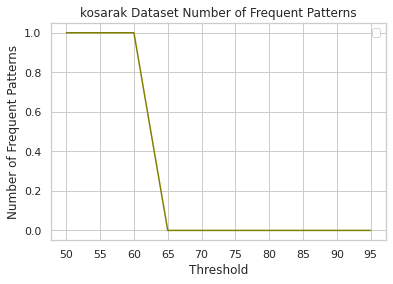

In [ ]:
import matplotlib.pyplot as plt
x = list(Fp_dataframe[['Threshold', 'Number_of_patterns']].drop_duplicates()['Threshold'])
y1 = list(Fp_dataframe[['Threshold', 'Number_of_patterns']].drop_duplicates()['Number_of_patterns'])
plt.plot(x, y1, color = 'olive')
# plt.plot(x, y2, label = 'FPGrowth', color= 'blue')

print(list(Fp_dataframe[['Threshold', 'Number_of_patterns']].drop_duplicates()['Number_of_patterns']))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Number of Frequent Patterns")
plt.title("kosarak Dataset Number of Frequent Patterns")
plt.legend()
plt.savefig('/content/drive/MyDrive/CSE477 Project/Chess Dataset Number of Frequent Patterns.png', dpi = 300)
plt.show()